In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from main import load_and_prepare_sessions
from analysis.performance_funcs import add_performance_container
from analysis.response_metrics import assign_responses
from processing.timepoint_analysis import aggregate_signals
from data.mouse import create_mice_dict
from data.data_loading import DataContainer


from collections import defaultdict
import matplotlib.pyplot as plt

sessions = load_and_prepare_sessions("../../Baseline", load_from_pickle=True, remove_bad_signal_sessions=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
mice_dict = create_mice_dict(sessions)

In [5]:
for mouse in mice_dict.values():
    add_performance_container(mouse)

    for session in mouse.sessions:
        session.metric_container = mouse.metric_container

assign_responses(mice_dict.values())
mouse_responses = {mouse.mouse_id: mouse.response_metrics for mouse in mice_dict.values()}

100%|██████████| 17/17 [00:09<00:00,  1.74it/s]


In [6]:
performance_metrics = {}
for mouse_id, mouse in mice_dict.items():
    performance_metrics[mouse_id] = mouse.metric_container.data

In [7]:
#mouse_responses, performance_metrics

In [8]:
mouse_responses['23'].keys()

dict_keys(['DMS_hit_slope_up', 'DMS_hit_slope_down', 'DMS_hit_maximal_value', 'DMS_hit_peak_timing', 'DMS_hit_auc', 'DMS_mistake_slope_up', 'DMS_mistake_slope_down', 'DMS_mistake_maximal_value', 'DMS_mistake_peak_timing', 'DMS_mistake_auc', 'DMS_miss_slope_up', 'DMS_miss_slope_down', 'DMS_miss_maximal_value', 'DMS_miss_peak_timing', 'DMS_miss_auc', 'DMS_cor_reject_slope_up', 'DMS_cor_reject_slope_down', 'DMS_cor_reject_maximal_value', 'DMS_cor_reject_peak_timing', 'DMS_cor_reject_auc', 'DMS_reward_collect_slope_up', 'DMS_reward_collect_slope_down', 'DMS_reward_collect_maximal_value', 'DMS_reward_collect_peak_timing', 'DMS_reward_collect_auc', 'DLS_hit_slope_up', 'DLS_hit_slope_down', 'DLS_hit_maximal_value', 'DLS_hit_peak_timing', 'DLS_hit_auc', 'DLS_mistake_slope_up', 'DLS_mistake_slope_down', 'DLS_mistake_maximal_value', 'DLS_mistake_peak_timing', 'DLS_mistake_auc', 'DLS_miss_slope_up', 'DLS_miss_slope_down', 'DLS_miss_maximal_value', 'DLS_miss_peak_timing', 'DLS_miss_auc', 'DLS_cor_

In [28]:
xs = []
ys = []

for mouse_id, mouse in mice_dict.items():
    # DLS_hit_slope_down
    try:
        xs.append(mouse_responses[mouse_id]['VS_mistake_slope_down'])
    except KeyError:
        continue
    ys.append(performance_metrics[mouse_id]['total_hits'])

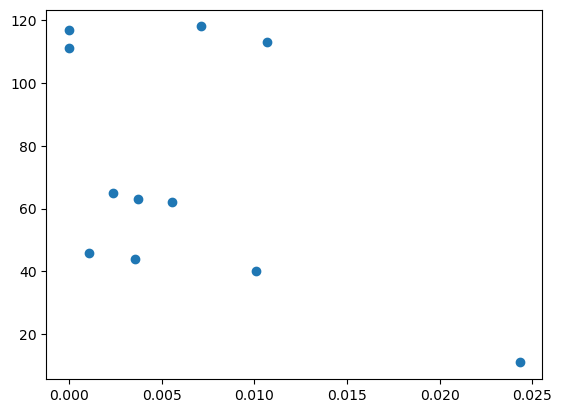

In [29]:
plt.scatter(xs, ys)